<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

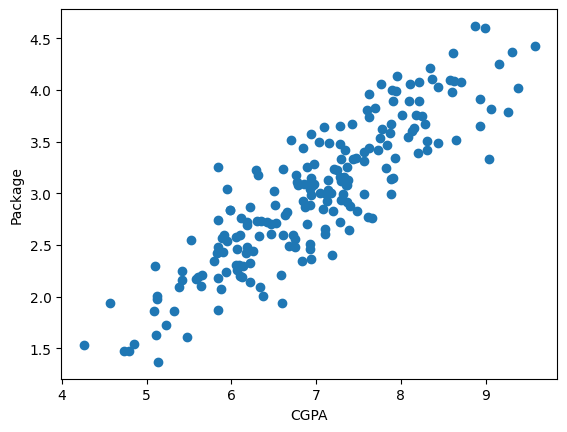

In [5]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [6]:
y = df['package']
X = df.drop(columns=['package'],  axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package')

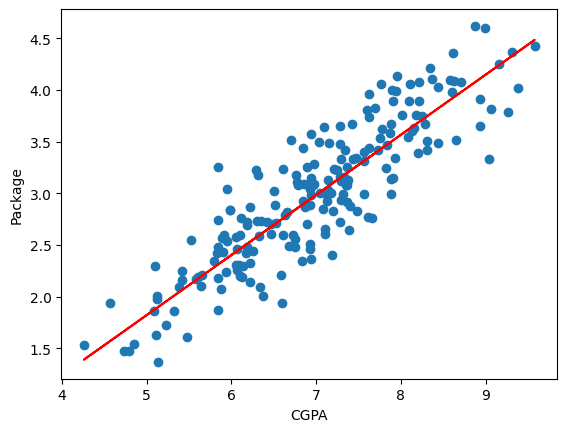

In [11]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([2.9383335 , 4.36894346, 3.18258398, 1.89736121, 3.49662031,
       3.35123312, 2.76968435, 2.94996447, 3.07208971, 3.94441286,
       3.57222165, 2.94996447, 2.75805338, 2.64755911, 3.67108494,
       3.2174769 , 3.97930579, 2.90925606, 2.19395108, 3.31052471,
       4.29915761, 2.8918096 , 1.87409926, 2.30444534, 3.62456104,
       2.12998071, 3.9269664 , 2.36841571, 1.5716939 , 2.06601035,
       2.31026083, 3.6885314 , 3.5024358 , 3.03719679, 2.57195777,
       2.39167766, 3.170953  , 3.82228762, 3.15932203, 2.94414898])

In [14]:
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)

0.29931188593316804


In [15]:
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.1370062519255722


In [16]:
RMSE = np.sqrt(MSE)
print(RMSE)

0.370143555834182


In [17]:
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.7283345498058083


In [21]:
X_test.shape[1]

1

In [24]:
# Adjusted R^2 score
r2_score_adjusted = 1 - ((1-r2_score)*(y_test.shape[0] - 1))/(y_test.shape[0] - 1 - X_test.shape[1])
print(r2_score_adjusted)

0.7211854590112243


In [29]:
df_copy = df.copy()
df_copy['rand_feature'] = np.random.random(df.shape[0])

In [31]:
df_copy.head()

,cgpa,package,rand_feature
0,6.89,3.26,0.472427
1,5.12,1.98,0.195334
2,7.82,3.25,0.328618
3,7.42,3.67,0.192207
4,6.94,3.57,0.674891


In [38]:
y = df_copy['package']
X = df_copy.drop(columns=['package'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
X_train

,cgpa,rand_feature
108,7.76,0.482216
107,6.33,0.871877
189,8.11,0.412577
14,7.73,0.611913
56,5.84,0.053540
...,...,...
133,6.05,0.539816
137,7.14,0.724702
72,7.78,0.852598
140,7.91,0.719730


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([ 0.58257249, -0.07225938])

In [44]:
model.intercept_

-1.0565426910581248

In [59]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
MAE = mean_absolute_error(y_test, y_pred)

In [70]:
MSE = mean_squared_error(y_test, y_pred)

In [71]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7310036911948157

In [72]:
X_test.shape[1]

2

In [73]:
r2_adj = 1 - ((1-r2_score)*(y_test.shape[0] - 1))/(y_test.shape[0] - 1 - X_test.shape[1])
print(r2_adj)

0.7164633501783192
